# CS-290 - Graded Assignment 2 - 26.11.2024

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Overall instructions</p>
    <div style="padding: 0 0 2px 10px;">

The notebook contains **2 independent exercises**:
* [Exercise 1: Chatbot Model Sustainability Analysis](#Exercice-1:-Chatbot-Model-Sustainability-Analysis): 7 questions for **11 points**
* [Exercise 2: The Carbon Footprint of ChatGPT](#Exercise-2:-The-carbon-footprint-of-ChatGPT): 6 questions for **9 points**

For each question, we indicate the number of corresponding points.  
You will find **two types of graded questions**:
* Programming questions ;
* Open ethical reflection questions, for which we provide an **indicative length** of text you are expected to write.

**Read carefully the text and instructions.**  
A lot of information is provided in the text. Take your time to understand the problem and the data.

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important!  
To avoid inconsistent states, make sure to regularly restart the kernel and re-execute cells from top to bottom.  
For that, you can use the menu `Kernel` > `Restart Kernel and run up to Selected Cell`.

</div></div>

Notebook by Mattéo Berthet and the Responsible software TAs team (2024).<br/>

Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

# Exercice 1: Chatbot Model Sustainability Analysis

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Save your work!</p>
    <div style="padding: 0 0 2px 10px;">

Make sure to regularly save your work: 
- either click on the floppy icon (💾) at the top of the notebook, 
- or click on the menu File > Save Notebook 
- or use the keyboard shortcut Ctrl+S.

</div></div>

## 1.1 - Introduction

ChatCrew is a company specialized in the development of Machine Learning models for enterprise chatbots. These chatbots assist workers by providing an easy dialog interface for any business-related question. ChatCrew is currently evaluating four different models to select the one that will be used in their main product line.

They are seeking your expertise to help them:
- calculate the carbon footprint of the models,
- make an informed decision to choose a model.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Run the folowing cell to load the data and display the dataset.

</div></div> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from res.utils import *

# Creating the DataFrame with larger model sizes, realistic metrics, and additional GPU inference requirements
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Training Time (GPU hours)': [1000000, 400000, 100000, 570000],
    'Model Size (Parameters, in B)': [175, 30, 6, 70],
    'Output Speed (tokens/sec)': [120, 72, 120, 180],
    'Accuracy (%)': [85.2, 78.4, 72.1, 81.0],
    'Number GPUs Required for Inference': [8, 3, 1, 4],
}

models_data_df = pd.DataFrame(data)

# Display the DataFrame
models_data_df

Model  Training Time (GPU hours)  Model Size (Parameters, in B)  \
0  Model 1                    1000000                            175   
1  Model 2                     400000                             30   
2  Model 3                     100000                              6   
3  Model 4                     570000                             70   

   Output Speed (tokens/sec)  Accuracy (%)  Number GPUs Required for Inference  
0                        120          85.2                                   8  
1                         72          78.4                                   3  
2                        120          72.1                                   1  
3                        180          81.0                                   4

This dataframe contains the following columns:
- `Model`: the name of the model
- `Training Time (GPU hours)`: The total GPU time in hours required to train the model, which already takes into account the number of GPUs used during training (it could have been trained with many GPUs but we rapport it to a single GPU to better compare the models)
- `Model Size (Parameters, in B)`: The number of parameters in the model, in billions. It is an indication of the complexity of the model.
- `Output Speed (tokens/sec)`: The speed of the model to generate text, in tokens per second. A token reprensent approximately 4 characters. The higher the speed, the faster the model can generate text for a given output size.
- `Accuracy (%)`: The accuracy of the model, in percentage. It is an indication of the performance of the model. The higher the accuracy, the better the model is at doing what it was trained to do.
- `Number GPUs Required for inference`: The number of GPUs required to run the model for inference. Inference is the process of using a trained model to generate text on new queries from users. We make the assumption that all GPUs are used during inference, therefore the higher the number of GPUs, the more energy the model will consume when generating text.

We suppose the GPU used for training and inference are the same as well as for each model.

## 1.2 - Calculate emissions

We want to calculate the  **total training** and **total inference** emissions for each model over 1 year. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.1  (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Assume that the GPU used both for training and inference consumes 450 `W`, and the carbon emissions from electricity represent 260 `g CO2e/kWh`. 1 user makes 5 requests per day with an average of 1000 tokens per request. For this computation, we assume the model is used by 10 000 users per day during 365 days.

Fill in the following variables with the appropriate values:
-  `gpu_power` : the power of a single GPU in kilowatts (`kW`)
-  `average_token_per_request` : the average number of tokens per request
-  `nb_request_per_user_per_day` : the number of request per day per user
-  `nb_user_per_day` : the number of users per day that use the model
-  `total_duration` : the total duration considered for the calculation, in number of days
-  `carbon_intensity` : the carbon intensity of the electricity consumption in kilograms of CO2e per kilowatt-hour (`kg CO2e/kWh`)

Check the **units** of your variables.

Complete the cell below.
</div></div> 

In [2]:
gpu_power = 0.450 # SOLUTION
average_token_per_request = 1000 # SOLUTION
nb_request_per_user_per_day = 5 # SOLUTION
nb_user_per_day = 10000 # SOLUTION
total_duration = 365 # SOLUTION
carbon_intensity = 0.260 # SOLUTION 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the variables you set are right type.  
This test does not guarantee that your code is correct.
</div></div> 

In [3]:
qassert(isinstance(gpu_power, nb.Number), "gpu_power should be a numerical value")
qassert(gpu_power <= 1, "gpu_power should be in kW")
qassert(isinstance(average_token_per_request, nb.Number), "average_token_per_request should be a numerical value")
qassert(isinstance(nb_request_per_user_per_day, nb.Number), "nb_request_per_user_per_day should be a numerical value")
qassert(isinstance(nb_user_per_day, nb.Number), "nb_user_per_day should be a numerical value")
qassert(isinstance(total_duration, nb.Number), "total_duration should be a numerical value")
qassert(isinstance(carbon_intensity, nb.Number), "carbon_intensity should be a numerical value")
qassert(carbon_intensity <= 1, "carbon_intensity should be in kg CO2e/kWh")

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
  Let's calculate the **total *training* emissions** for each model in `kg CO2e`. We will create a new column `Training CO2e (kg)` in the dataframe `models_data_df` that contains the total training emissions for each model.  

The following formula gives you the total electricity used for training in `kWh`, you need to convert this electricity into a carbon footprint in `kg CO2e`.

$$\text{Total electricity training} = \text{total number of GPU hours required for training} \times \text{single GPU power} $$

Complete the cell below.
</div></div> 

In [4]:
models_data_df['Training CO2e (kg)'] = models_data_df['Training Time (GPU hours)'] * gpu_power * carbon_intensity #SOLUTION
models_data_df

Model  Training Time (GPU hours)  Model Size (Parameters, in B)  \
0  Model 1                    1000000                            175   
1  Model 2                     400000                             30   
2  Model 3                     100000                              6   
3  Model 4                     570000                             70   

   Output Speed (tokens/sec)  Accuracy (%)  \
0                        120          85.2   
1                         72          78.4   
2                        120          72.1   
3                        180          81.0   

   Number GPUs Required for Inference  Training CO2e (kg)  
0                                   8            117000.0  
1                                   3             46800.0  
2                                   1             11700.0  
3                                   4             66690.0

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the values you obtain are in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [5]:
assert 'Training CO2e (kg)' in models_data_df.columns, 'Training CO2e (kg) column is missing'
qassert((models_data_df['Training CO2e (kg)'] != ...).all() and \
        max(models_data_df['Training CO2e (kg)']) < 150000 and \
        min(models_data_df['Training CO2e (kg)']) > 5000, "Training CO2e (kg) values are not correct")

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.3 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
  Let's calculate the **total *inference* emissions** for each model in `kg CO2e`. We will create a new column `Training CO2e (kg)` in the dataframe `models_data_df` that contains the total training emissions for each model.

The following formula gives you the total electricity used for inference:

$$
\text{Total electricity inference} = 
\underbrace{\frac{\text{Total number of tokens generated over 1 year}}{\text{Speed of the model in tokens per second}}}_{\text{Total computation time in seconds}}
\times 
\underbrace{\frac{1}{3600}}_{\text{Conversion in hours}}
\times 
\underbrace{\text{Number of GPUs} \times \text{Power consumption per GPU in kW}}_{\text{Total power consumed by the model in kW}}
$$

This formula has 3 parts:
- the total computation time used for the model over one year, in `seconds`: it is obtained by dividing the total number of tokens generated over 1 year by the speed of the model
- conversion of this time into `hours`
- the total power consumed by the model during computation, in `kW`: it depends on the number of GPUs and the power consumed by each GPU

The result is electricity consumption in `kWh`. You need to convert this electricity into a carbon footprint in `kg CO2e`.

Complete the cell below.
</div></div> 

In [6]:
total_computation_time_seconds = nb_user_per_day * nb_request_per_user_per_day * average_token_per_request * total_duration / models_data_df['Output Speed (tokens/sec)'] # SOLUTION
total_computation_time_hours = total_computation_time_seconds / 3600 # SOLUTION
electricity_computation = models_data_df['Number GPUs Required for Inference'] * gpu_power # SOLUTION
models_data_df['Inference CO2e (kg)'] = total_computation_time_hours * electricity_computation * carbon_intensity # SOLUTION
models_data_df

Model  Training Time (GPU hours)  Model Size (Parameters, in B)  \
0  Model 1                    1000000                            175   
1  Model 2                     400000                             30   
2  Model 3                     100000                              6   
3  Model 4                     570000                             70   

   Output Speed (tokens/sec)  Accuracy (%)  \
0                        120          85.2   
1                         72          78.4   
2                        120          72.1   
3                        180          81.0   

   Number GPUs Required for Inference  Training CO2e (kg)  Inference CO2e (kg)  
0                                   8            117000.0         39541.666667  
1                                   3             46800.0         24713.541667  
2                                   1             11700.0          4942.708333  
3                                   4             66690.0         13180.555556

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the values you obtain are in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [7]:
qassert('Inference CO2e (kg)' in models_data_df.columns, 'Inference CO2e (kg) column is missing')
qassert((models_data_df['Inference CO2e (kg)'] != ...).all() and \
        max(models_data_df['Inference CO2e (kg)']) < 50000 and \
        min(models_data_df['Inference CO2e (kg)']) > 3000, "Inference CO2e values are not correct")

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.4 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Let's calculate the **total emissions (training + inference)** for each model in `kg CO2e`. We will create a new column `Total CO2e (kg)` in the dataframe `models_data_df` that contains the total emissions for each model.

Complete the cell below.
</div></div> 

In [8]:
models_data_df['Total CO2e (kg)'] = models_data_df['Training CO2e (kg)'] + models_data_df['Inference CO2e (kg)'] # SOLUTION
models_data_df

Model  Training Time (GPU hours)  Model Size (Parameters, in B)  \
0  Model 1                    1000000                            175   
1  Model 2                     400000                             30   
2  Model 3                     100000                              6   
3  Model 4                     570000                             70   

   Output Speed (tokens/sec)  Accuracy (%)  \
0                        120          85.2   
1                         72          78.4   
2                        120          72.1   
3                        180          81.0   

   Number GPUs Required for Inference  Training CO2e (kg)  \
0                                   8            117000.0   
1                                   3             46800.0   
2                                   1             11700.0   
3                                   4             66690.0   

   Inference CO2e (kg)  Total CO2e (kg)  
0         39541.666667    156541.666667  
1         24713.541667     71513.541667  
2          4942.708333     16642.708333  
3         13180.555556     79870.555556

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the values you obtain are in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [9]:
assert "Total CO2e (kg)" in models_data_df.columns, "Total CO2e (kg) column is missing"
qassert((models_data_df['Total CO2e (kg)'] != ...).all() and \
        max(models_data_df['Total CO2e (kg)']) < 200000 and \
        min(models_data_df['Total CO2e (kg)']) > 10000, "Total CO2e (kg) values are not correct")

## 1.3 - Model comparison

We now have the total emissions for each model. Let's analyze the results.

On the following plot, we plot the total emissions for each model in kg CO2e in function of the accuracy in percentage.

<img src="res/model_comparison.svg" width="800">

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.3.1 (2 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
  Based on the plot above, explain the main strength and weakness for each model: write 1 sentence per model and provide numerical evidence to support your answer. This will be your data to help the ChatCrew company make a decision.  
  
</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.3.2 (3 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
- What are the two ethical values / principles that are opposed in this situation? Which metrics represent these ethical values / principles in our analysis?
- What is the dilemma for the ChatCrew company?

Write 3 sentences.

</div></div> 

## 1.4 - Influence of the number of users

Let's analyse the following plot to understand the impact of the number of users on the total emissions. 

While before we were considering 10 000 users, a more recent evaluation by the commercial team of the ChatCrew company indicates that they expect to have **100 000 users**. We want to understand the impact of this change on our analysis. The y-axis represents the total emissions in **tons** of CO2e and the x-axis the number of users.

<img src="res/total_co2e_vs_users.svg" width="800">

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.4.1 (2 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
The ChatCrew company has selected **Model 2** and **Model 4** as potential candidates for their product.  
Given the new expectation of **100 000 users** instead of 10 000 during the year, what should be their final decision?  

Write 2-3 sentences detailing the choice they should make , the criteria they should use for that choice, and the corresponding numerical evidence.

</div></div> 

# Exercise 2: The carbon footprint of ChatGPT

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Save your work!</p>
    <div style="padding: 0 0 2px 10px;">

Make sure to regularly save your work: 
- either click on the floppy icon (💾) at the top of the notebook, 
- or click on the menu File > Save Notebook 
- or use the keyboard shortcut Ctrl+S.

</div></div>


ChatGPT has received significant attention since its launch at the end of 2022 thanks to its impressive ability to generate human-like text responses. Yet, its environmental impact is often overlooked. 

In the previous section, we focused on the carbon footprint of training and evaluating machine learning models. However, in the case of a tool like ChatGPT, whose adoption broke all the records, the carbon footprint of its daily usage (aka inference phase) can quickly overcome that of its training.

### 2.1 - Yearly usage for an individual student

We want to estimate the **number of tokens generated by an average EPFL student** using ChatGPT during one year, from 01/09/2023 to 01/09/2024.  
A token is a unit of text, such as a word or subword, used by transformers for processing and analysis in natural language tasks.

We base ourselves on real data of an EPFL Master student who used ChatGPT almost daily during classes, group projects, and personal projects.  


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
	
Run the following cell to load the data and display the dataset.

</div></div>

In [10]:
import pandas as pd
import os

from res.utils import *

epfl_student_df = pd.read_csv(os.path.join("dataset","epfl_student_chatgpt.csv"))

epfl_student_df.head()

Date  Number of characters  Number of queries
0  2023-09-19                  7667                 34
1  2023-09-20                  3439                  4
2  2023-09-21                 12296                 22
3  2023-09-23                  1660                  2
4  2023-09-24                  7605                  8

About the dataset:
- The column `Date` represents the days where the student used ChatGPT.
- The column `Number of characters` represents the total number of characters from both the input and output of the student’s queries on that day. It does not differentiate between input and output.
- The column `Number of queries` represents the number of queries the student made on that day.

**/!\ Important notes**: 
- A **token** is equivalent to **4 characters**.
- A **query** is a request made by the student to ChatGPT together with its response. It can be a question, a command, or any other form of text input. When saying "query", we refer to both the text input made by the student and its associated output generated by ChatGPT. We do not differentiate between the input and output in this analysis, we just consider the total number of characters.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
	
Run the following cell to plot the data and better understand the dataset.

</div></div>

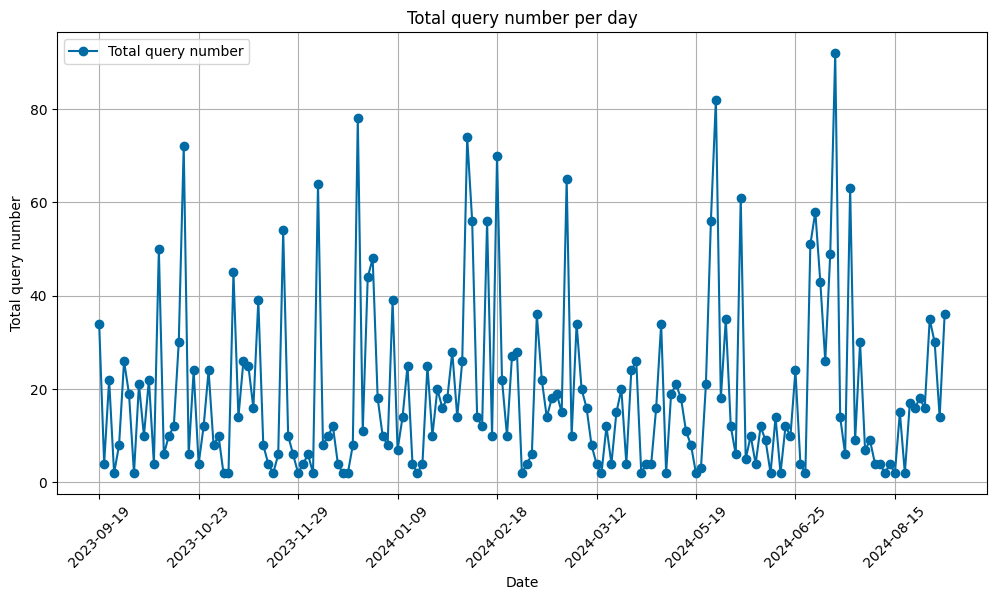

In [11]:
plot_queries_per_day(epfl_student_df)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.1.1 (1 point) </p>
    <div style="padding: 0 0 2px 10px;">

Let's compute:
- `total_number_queries` : the total number of queries made by the student during the year
- `total_character_year` : the total number of characters generated by the student’s queries during the year
- `total_token_year` : the total number of tokens generated by the student during the year (remember a token is 4 characters)
- `average_query_day` : the average number of queries made by the student per day during the 365 days of the year
- `average_query_size` : the average number of characters generated by a query made by the student

Complete the cell below.

</div></div>

In [12]:
total_number_queries = epfl_student_df["Number of queries"].sum() # SOLUTION
total_character_year = epfl_student_df["Number of characters"].sum() # SOLUTION
total_token_year = total_character_year / 4 # SOLUTION
average_query_day = total_number_queries / 365 # SOLUTION
average_query_size = total_character_year / total_number_queries # SOLUTION


print("The total number of queries is", total_number_queries)
print("The total query size is", total_character_year)
print("The total number of tokens per year is", total_token_year)
print("The average number of queries per day is", qround(average_query_day, 2))
print("The average query size is", qround(average_query_size, 2))

The total number of queries is 3290
The total query size is 4677352
The total number of tokens per year is 1169338.0
The average number of queries per day is 9.01
The average query size is 1421.69


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the values you obtain are in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [13]:
qassert(isinstance(total_number_queries, nb.Number), "total_number_queries should be a numerical value")
qassert(total_number_queries > 3000, "check how you compute total_number_queries")
qassert(isinstance(total_character_year, nb.Number), "total_character_year should be a numerical value")
qassert(isinstance(total_token_year, nb.Number), "total_token_year should be a numerical value")
qassert(isinstance(average_query_day, nb.Number), "average_query_day should be a numerical value")
qassert(isinstance(average_query_size, nb.Number), "average_query_size should be a numerical value")

## 2.2 - Carbon footprint per token

Let's roughly estimate the **average carbon emissions per token** generated by ChatGPT 4o (latest model). The goal of this question is to have an idea of how this number can be estimated even if it's not perfectly accurate. 


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.2.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

Based on information available online, we hypothesize the following technical setup:
- The model needs eight A100 GPUs to run.
- One single A100 GPU consumes `407 W` of power at full load.
- The model is hosted on Azure US West with an average `PUE of 1.2` (it means that for 100W of computing power, the actual consuption will be 120W beacuse of the datacenter managment such as cooling, etc) 
- The average carbon intensity in the region is `262 gCO2eq/kWh` (according to electricitymaps.com).
- The output speed of the model is `107.5 tokens/second`.

The following formula gives you the electricity consumtion per token in `kWh`, you need to convert it to a carbon footprint in  `g CO2e`:

$$
\text{Electricity for 1 token generated} = 
\underbrace{
\frac{\text{1 Token}}{\text{Number of token generated per second}}
}_{\text{Time in seconds to generate one token}}
\times
\underbrace{\frac{1}{3600}}_{\text{Conversion in hours}}
\times 
\underbrace{\text{Number of GPUs} \times \text{Power consumption per GPU in kW} \times \text{PUE}}_{\text{Total power consumed by the model in kW}}
$$

Pay attention to your units.

Complete the cell below.
</div></div>

In [14]:
time_per_token_seconds = 1 / 107.5 # SOLUTION 
time_per_token_hours = time_per_token_seconds / 3600 # SOLUTION 
power_consumed = 8 * 0.407 * 1.2 # SOLUTION
footprint_per_token = time_per_token_hours * power_consumed * 262 # SOLUTION

print("The amount of CO2e emitted per token is", qround(footprint_per_token, 4), "grams of CO2e.")

The amount of CO2e emitted per token is 0.0026 grams of CO2e.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the values you obtain are in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [15]:
qassert(isinstance(time_per_token_seconds, nb.Number), "time_per_token_seconds should be a numerical value")
qassert(isinstance(time_per_token_hours, nb.Number), "time_per_token_hours should be a numerical value")
qassert(isinstance(power_consumed, nb.Number), "power_consumed should be a numerical value")
qassert(power_consumed < 100, "power_consumed: check your units!")
qassert(isinstance(footprint_per_token, nb.Number), "footprint_per_token should be a numerical value")
qassert(footprint_per_token > 1e-03, "footprint_per_token: check your units!")

## 2.3 - EPFL carbon footprint estimation

We now want to estimate the carbon footprint of **all EPFL students using ChatGPT during the year**.  
We make the following assumptions:
- EPFL has 10 000 students in total, 75% of which use ChatGPT daily for various tasks.
- We consider that all students use ChatGPT in the same way as the student you calculated the yearly estimate for previously.

It's difficult to have an accurate estimation of the emissions per token generated by ChatGPT 4o this value, we will use a range to have an idea of the order of magnitude:
- As an upper bound, we will consider the roughly estimated value you calculated in the previous question, stored in the variable `footprint_per_token`.
- As a lower bound, we will consider the emissions per token generated by ChatGPT 4o to be `0.0008 gCO2e` per token (this estimation comes from this [paper](https://www.goldmansachs.com/pdfs/insights/pages/generational-growth-ai-data-centers-and-the-coming-us-power-surge/report.pdf) which tells us that a query of around 1000 tokens consumes 0.0029 kWh of energy).



<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.3.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

Let's define the following variables:
- `number_students` : the number of EPFL students using ChatGPT daily
- `token_per_student_per_year` : the total number of tokens generated by a single student during the year, as obtained in question 2.1.1
- `lower_bound_emissions_per_token` : the lower bound of the emissions per token generated by ChatGPT in kg CO2e
- `upper_bound_emissions_per_token` : the upper bound of the emissions per token generated by ChatGPT in kg CO2e

For this calculation we want the emissions to be in **kg CO2e**, pay attention to your units.

</div></div>

In [16]:
number_students = 10000 * 0.75 # SOLUTION

token_per_student_per_year = total_token_year # total number of tokens generated by a single student during the year, as obtained in question 2.1.1

lower_bound_carbon_emissions_kg_per_token =  0.0008 / 1000 # in kg CO2eq # SOLUTION
upper_bound_carbon_emissions_kg_per_token =  footprint_per_token / 1000 # in kg CO2eq # SOLUTION

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following test to help you check that the variables you set are right type.  
This test does not guarantee that your code is correct.
</div></div> 

In [17]:
qassert(isinstance(number_students, nb.Number), "number_students should be a numerical value")
qassert(number_students < 10000, "check how you compute number_students")
qassert(isinstance(lower_bound_carbon_emissions_kg_per_token, nb.Number), "lower_bound_carbon_emissions_kg_per_token should be a numerical value")
qassert(isinstance(upper_bound_carbon_emissions_kg_per_token, nb.Number), "upper_bound_carbon_emissions_kg_per_token should be a numerical value")

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.3.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

  Let's complete the following function `yearly_carbon_emissions_chatgpt()` to calculate the yearly estimate of the carbon footprint from ChatGPT for a given number of people, a given number of tokens generated per year and a given emissions per token. The function should return the yearly carbon footprint in kg CO2e.

The parameters of the function are the following:
- `total_number_people` : the total number of people using ChatGPT
- `total_number_tokens` : the total number of tokens generated by a single person during the year
- `emissions_per_token` : the emissions per token generated by ChatGPT in kg CO2e

</div></div>

In [18]:
def yearly_carbon_emissions_chatgpt(total_number_people, total_number_tokens, emissions_per_token):

    carbon_emissions_per_year = total_number_people * total_number_tokens * emissions_per_token  # SOLUTION

    return carbon_emissions_per_year

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the following cell to display the results. 
We use the variables and functions you have defined above to calculate the yearly carbon footprint of EPFL students using ChatGPT.

</div></div>

In [19]:
lower_bound_yearly_emissions_chatgpt = yearly_carbon_emissions_chatgpt(
    number_students,
    token_per_student_per_year,
    lower_bound_carbon_emissions_kg_per_token,
)
upper_bound_carbon_emissions_chatgpt = yearly_carbon_emissions_chatgpt(
    number_students,
	token_per_student_per_year,
	upper_bound_carbon_emissions_kg_per_token,
)

print("For the lower bound, the yearly carbon emissions of ChatGPT are:\n")
print_emissions_translation(lower_bound_yearly_emissions_chatgpt)
print("\n")
print("For the upper bound, the yearly carbon emissions of ChatGPT are:\n")
print_emissions_translation(upper_bound_carbon_emissions_chatgpt)

For the lower bound, the yearly carbon emissions of ChatGPT are:

7 016 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 42 807 km,
🛫 taking an international flight for 37 737 km or
🚂 travelling by train for 1 573 100 km.


For the upper bound, the yearly carbon emissions of ChatGPT are:

23 198 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 141 540 km,
🛫 taking an international flight for 124 776 km or
🚂 travelling by train for 5 201 426 km.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instruction</p>
    <div style="padding: 0 0 2px 10px;">
        
We provide the following tests to help you check that the values you obtain are in the right interval.  
These tests do not guarantee that your code is correct. Make sure to run some tests on your side.
</div></div> 

In [20]:
qassert(lower_bound_yearly_emissions_chatgpt is not ... and \
        lower_bound_yearly_emissions_chatgpt < 10000 and \
        lower_bound_yearly_emissions_chatgpt > 4000, "Lower bound estimation obtained not correct")
qassert(upper_bound_carbon_emissions_chatgpt is not ... and \
        upper_bound_carbon_emissions_chatgpt < 30000 and \
        upper_bound_carbon_emissions_chatgpt > 10000, "Upper bound estimation obtained not correct")

## 2.4 - Embodied emissions

In the previous analysis, we focused on the operational emissions of ChatGPT. However, an important part of emissions to consider is the embodied emissions. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.1 (3 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
What do the embodied emissions of a model represent in the case of ChatGPT? Write 3 sentences to explain this concept.

</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.2 (2 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
  Let's imagine that, after two years of use, OpenAI wants to upgrade the GPUs used in their datacenter(s). In an effort to improve ChatGPT's sustainability, they choose GPUs that are twice as fast as the previous ones in terms of computing speed, for the exact same energy consumption.  
What are the potential issues with this approach in terms of sustainability? You should identify at least 2 potential issues, and write 1 sentence per issue.
  
</div></div> 

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Final instructions</p>
    <div style="padding: 0 0 2px 10px;">

Congratulations on finishing this second graded assignment!

Make sure to **save your work** either by clicking on the floppy icon (💾) at the top of the notebook, clicking on the menu `File > Save Notebook` or by using the keyboard shortcut `Ctrl+S`.

Then go to the [moodle page of the course](https://moodle.epfl.ch) to submit your work. 


</div></div>